In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Función y gradiente ----------
def f(x, y):
    """-3*y / (x^2 + y^2 + 1)"""
    return -3.0 * y / (x**2 + y**2 + 1.0)

def grad(x, y):
    """∇f(x,y) en forma numpy array"""
    d2 = (x**2 + y**2 + 1.0)**2          # (x²+y²+1)²
    df_dx = 6.0 * x * y / d2
    df_dy = 3.0 * (-x**2 + y**2 - 1.0) / d2
    return np.array([df_dx, df_dy])

# ---------- 2. Hiper-parámetros comunes ----------
LR      = 0.1       # λ
BETA1   = 0.9       # β1   (Momentum, Nesterov, RMSprop, Adam)
BETA2   = 0.999     # β2   (Adam)
EPSILON = 1e-8
N_STEPS = 1000
X0      = np.array([0.0, -2.0])          # (x0, y0)

# ---------- 3. Algoritmos ----------
def gd(lr=LR, steps=N_STEPS):
    x = X0.copy()
    path = [x.copy()]
    for _ in range(steps):
        x -= lr * grad(*x)
        path.append(x.copy())
    return np.array(path)

def momentum(lr=LR, beta=BETA1, steps=N_STEPS):
    x, v = X0.copy(), np.zeros(2)
    path = [x.copy()]
    for _ in range(steps):
        v = beta * v + (1-beta) * grad(*x)
        x -= lr * v
        path.append(x.copy())
    return np.array(path)

def nesterov(lr=LR, beta=BETA1, steps=N_STEPS):
    x, v = X0.copy(), np.zeros(2)
    path = [x.copy()]
    for _ in range(steps):
        g = grad(*(x - lr * beta * v))   # gradiente en el punto adelantado
        v = beta * v + (1-beta) * g
        x -= lr * v
        path.append(x.copy())
    return np.array(path)

def adagrad(lr=LR, eps=EPSILON, steps=N_STEPS):
    x, s = X0.copy(), np.zeros(2)
    path = [x.copy()]
    for _ in range(steps):
        g = grad(*x)
        s += g**2
        x -= lr * g / (np.sqrt(s) + eps)
        path.append(x.copy())
    return np.array(path)

def rmsprop(lr=LR, beta=BETA1, eps=EPSILON, steps=N_STEPS):
    x, s = X0.copy(), np.zeros(2)
    path = [x.copy()]
    for _ in range(steps):
        g = grad(*x)
        s = beta * s + (1-beta) * g**2
        x -= lr * g / (np.sqrt(s) + eps)
        path.append(x.copy())
    return np.array(path)

def adam(lr=LR, b1=BETA1, b2=BETA2, eps=EPSILON, steps=N_STEPS):
    x, v, s = X0.copy(), np.zeros(2), np.zeros(2)
    path = [x.copy()]
    for t in range(steps):
        g = grad(*x)
        v = b1 * v + (1-b1) * g
        s = b2 * s + (1-b2) * g**2
        v_hat = v / (1 - b1**(t+1))      # bias-correction
        s_hat = s / (1 - b2**(t+1))
        x -= lr * v_hat / (np.sqrt(s_hat) + eps)
        path.append(x.copy())
    return np.array(path)

# ---------- 4. Ejecutar los seis métodos ----------
paths = {
    "GD"       : gd(),
    "Momentum" : momentum(),
    "Nesterov" : nesterov(),
    "Adagrad"  : adagrad(),
    "RMSprop"  : rmsprop(),
    "Adam"     : adam(),
}

# ---------- 5. Resumen numérico ----------
records = []
for name, p in paths.items():
    xf, yf = p[-1]
    records.append({
        "Método" : name,
        "x_final": xf,
        "y_final": yf,
        "f_final": f(xf, yf)
    })

df = pd.DataFrame(records).set_index("Método")
print(df.round(6))


          x_final    y_final   f_final
Método                                
GD            0.0  -9.423963  0.314793
Momentum      0.0  -9.466937  0.313396
Nesterov      0.0  -9.459521  0.313636
Adagrad       0.0  -6.367604  0.459795
RMSprop       0.0 -96.334662  0.031138
Adam          0.0 -24.820260  0.120673


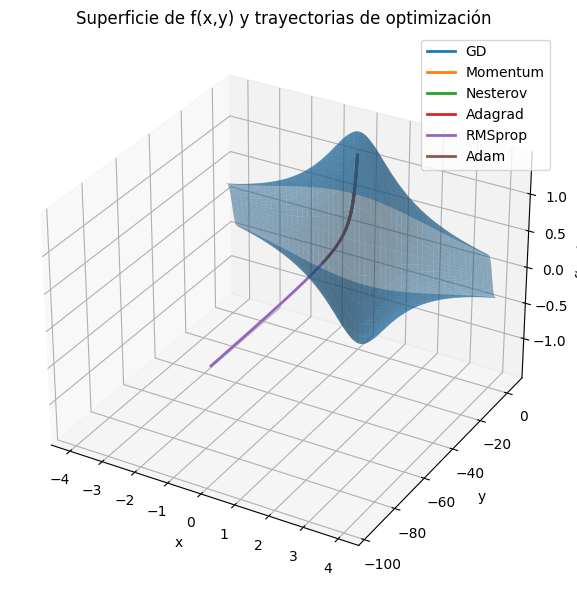

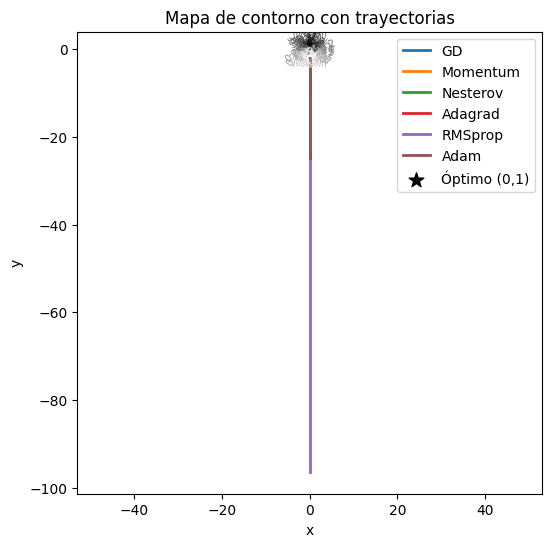

In [4]:
# ---------- 1. Mallado de la superficie ----------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401 (activa el proyector 3-D)

# Rango de la rejilla (ajústalo si quieres ver más/menos área)
Xrange = Yrange = np.linspace(-4, 4, 400)
XX, YY = np.meshgrid(Xrange, Yrange)
ZZ = f(XX, YY)

# ---------- 2. Colores para cada método ----------
cmap_methods = {
    "GD"      : "tab:blue",
    "Momentum": "tab:orange",
    "Nesterov": "tab:green",
    "Adagrad" : "tab:red",
    "RMSprop" : "tab:purple",
    "Adam"    : "tab:brown",
}

# ---------- 3-A. Gráfico 3-D ----------
fig = plt.figure(figsize=(10, 6))
ax  = fig.add_subplot(111, projection="3d")
ax.plot_surface(XX, YY, ZZ, alpha=0.5, rstride=8, cstride=8, linewidth=0)
for name, path in paths.items():
    ax.plot(path[:,0], path[:,1], f(path[:,0], path[:,1]),
            color=cmap_methods[name],
            label=name, linewidth=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Superficie de f(x,y) y trayectorias de optimización")
ax.legend()
plt.tight_layout(); plt.show()

# ---------- 3-B. Contorno 2-D ----------
plt.figure(figsize=(6, 6))
cs = plt.contour(XX, YY, ZZ, levels=40, linewidths=0.5, cmap="gray")
plt.clabel(cs, fmt="%.1f", fontsize=7)
for name, path in paths.items():
    plt.plot(path[:,0], path[:,1],
             color=cmap_methods[name],
             label=name, linewidth=2)
plt.scatter(0, 1, c="black", marker="*", s=120, label="Óptimo (0,1)")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Mapa de contorno con trayectorias")
plt.legend(); plt.axis("equal"); plt.show()



Resumen Pregunta 2 (1000 iteraciones):

           x_final   y_final   f_final  grad_norm  iter_tol_0.01
Método                                                          
GD        0.000000  0.000000  0.000000   0.000000             21
Momentum -0.000000 -0.000000  0.000000   0.000000             46
Nesterov  0.000000  0.000000  0.000000   0.000000             46
RMSprop   0.050000 -0.050000  0.007500   0.223607             67
Adam     -0.000000 -0.000000  0.000000   0.000000             82
Adagrad   0.690394  0.032239  0.478723   1.386797            115


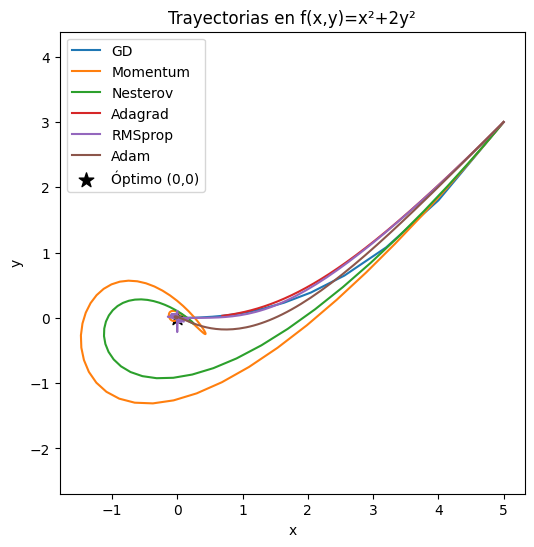

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1. Nueva función y gradiente (Pregunta 2)
# ----------------------------------------------------------------------
def f2(x, y):
    """f(x,y) = x^2 + 2 y^2"""
    return x**2 + 2.0 * y**2

def grad2(x, y):
    """∇f(x,y) = <2x, 4y>"""
    return np.array([2.0 * x, 4.0 * y])

# Hiper-parámetros (idénticos al enunciado)
LR, BETA1, BETA2, EPS = 0.1, 0.9, 0.999, 1e-8
N_STEPS = 1000
X0 = np.array([5.0, 3.0])     # punto inicial

# ----------------------------------------------------------------------
# 2. Algoritmos de optimización
# ----------------------------------------------------------------------
def gd2(lr=LR, steps=N_STEPS):
    x = X0.copy(); path = [x.copy()]
    for _ in range(steps):
        x = x - lr * grad2(*x)
        path.append(x.copy())
    return np.array(path)

def momentum2(lr=LR, beta=BETA1, steps=N_STEPS):
    x, v = X0.copy(), np.zeros(2); path = [x.copy()]
    for _ in range(steps):
        v = beta * v + (1-beta) * grad2(*x)
        x = x - lr * v
        path.append(x.copy())
    return np.array(path)

def nesterov2(lr=LR, beta=BETA1, steps=N_STEPS):
    x, v = X0.copy(), np.zeros(2); path = [x.copy()]
    for _ in range(steps):
        g = grad2(*(x - lr * beta * v))
        v = beta * v + (1-beta) * g
        x = x - lr * v
        path.append(x.copy())
    return np.array(path)

def adagrad2(lr=LR, eps=EPS, steps=N_STEPS):
    x, s = X0.copy(), np.zeros(2); path = [x.copy()]
    for _ in range(steps):
        g = grad2(*x); s += g**2
        x = x - lr * g / (np.sqrt(s) + eps)
        path.append(x.copy())
    return np.array(path)

def rmsprop2(lr=LR, beta=BETA1, eps=EPS, steps=N_STEPS):
    x, s = X0.copy(), np.zeros(2); path = [x.copy()]
    for _ in range(steps):
        g = grad2(*x); s = beta * s + (1-beta) * g**2
        x = x - lr * g / (np.sqrt(s) + eps)
        path.append(x.copy())
    return np.array(path)

def adam2(lr=LR, b1=BETA1, b2=BETA2, eps=EPS, steps=N_STEPS):
    x, v, s = X0.copy(), np.zeros(2), np.zeros(2); path = [x.copy()]
    for t in range(steps):
        g = grad2(*x)
        v = b1 * v + (1-b1) * g
        s = b2 * s + (1-b2) * g**2
        v_hat = v / (1 - b1**(t+1))
        s_hat = s / (1 - b2**(t+1))
        x = x - lr * v_hat / (np.sqrt(s_hat) + eps)
        path.append(x.copy())
    return np.array(path)

# ----------------------------------------------------------------------
# 3. Ejecutar los métodos y almacenar trayectorias
# ----------------------------------------------------------------------
paths2 = {
    "GD"      : gd2(),
    "Momentum": momentum2(),
    "Nesterov": nesterov2(),
    "Adagrad" : adagrad2(),
    "RMSprop" : rmsprop2(),
    "Adam"    : adam2(),
}

# ----------------------------------------------------------------------
# 4. Medir la primera iteración k con ||X_k - X_{k-1}|| < 0.01
# ----------------------------------------------------------------------
def first_small_step(path, tol=0.01):
    deltas = np.linalg.norm(np.diff(path, axis=0), axis=1)
    idx = np.where(deltas < tol)[0]
    return int(idx[0]) if idx.size else None   # None si nunca se logra

records = []
for name, p in paths2.items():
    xf, yf = p[-1]
    fx     = f2(xf, yf)
    gnorm  = np.linalg.norm(grad2(xf, yf))
    k_tol  = first_small_step(p, tol=0.01)

    records.append({
        "Método": name,
        "x_final": xf,
        "y_final": yf,
        "f_final": fx,
        "grad_norm": gnorm,
        "iter_tol_0.01": k_tol,
    })

df2 = (pd.DataFrame(records)
       .set_index("Método")
       .sort_values("iter_tol_0.01"))
print("\nResumen Pregunta 2 (1000 iteraciones):\n")
print(df2.round(6))

# ----------------------------------------------------------------------
# 5. (Opcional) gráfico 2-D de las trayectorias
# ----------------------------------------------------------------------
plt.figure(figsize=(6,6))
for name, p in paths2.items():
    plt.plot(p[:,0], p[:,1], label=name)
plt.scatter(0,0, c="black", marker="*", s=120, label="Óptimo (0,0)")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Trayectorias en f(x,y)=x²+2y²")
plt.axis("equal"); plt.legend(); plt.show()


In [11]:
# ------------------------------------------------------------------
# Valores finales de la función objetivo tras 1000 iteraciones
# ------------------------------------------------------------------
valores_f = {name: f2(*path[-1]) for name, path in paths2.items()}

print("f(x,y) al cabo de 1000 iteraciones:\n")
for metodo, valor in valores_f.items():
    print(f"{metodo:<10s} -> {valor:.10f}")


f(x,y) al cabo de 1000 iteraciones:

GD         -> 0.0000000000
Momentum   -> 0.0000000000
Nesterov   -> 0.0000000000
Adagrad    -> 0.4787227842
RMSprop    -> 0.0074999990
Adam       -> 0.0000000000


EJS 2

In [12]:
import numpy as np

# Función objetivo
def f(x, y):
    return x**2 + 2 * y**2

# Gradiente de la función
def grad_f(x, y):
    df_dx = 2 * x
    df_dy = 4 * y
    return np.array([df_dx, df_dy])

# Prueba rápida
x0, y0 = 5.0, 3.0
print(f"f({x0}, {y0}) =", f(x0, y0))
print("∇f({x0}, {y0}) =", grad_f(x0, y0))


f(5.0, 3.0) = 43.0
∇f({x0}, {y0}) = [10. 12.]


In [13]:
# Parámetros
learning_rate = 0.1
x_init = np.array([5.0, 3.0])
tolerance = 0.01
max_iters = 1000

# Función para descenso gradiente
def gradient_descent(f, grad_f, x0, lr, tol, max_iters):
    x = x0.copy()
    history = [x.copy()]
    
    for i in range(max_iters):
        grad = grad_f(x[0], x[1])
        x_new = x - lr * grad
        history.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            print(f"Convergió en {i+1} iteraciones.")
            return x_new, history, i+1
        
        x = x_new

    print("No convergió dentro del límite de iteraciones.")
    return x, history, max_iters

# Ejecutar descenso gradiente
x_final, path, iters = gradient_descent(f, grad_f, x_init, learning_rate, tolerance, max_iters)

# Resultados
print(f"Resultado final: x = {x_final}, f(x) = {f(x_final[0], x_final[1])}")


Convergió en 22 iteraciones.
Resultado final: x = [3.68934881e-02 3.94865112e-05], f(x) = 0.0013611325860528802


In [14]:
def run_all_optimizers():
    x0 = np.array([5.0, 3.0])
    lr = 0.1
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    tol = 0.01
    max_iter = 1000

    results = {}

    # Descenso gradiente
    x = x0.copy()
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        x_new = x - lr * grad
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Gradiente'] = (x, i+1, f(x[0], x[1]))

    # Momentum
    x = x0.copy()
    v = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        v = beta1 * v - lr * grad
        x_new = x + v
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Momentum'] = (x, i+1, f(x[0], x[1]))

    # Nesterov
    x = x0.copy()
    v = np.zeros_like(x)
    for i in range(max_iter):
        lookahead = x + beta1 * v
        grad = grad_f(lookahead[0], lookahead[1])
        v = beta1 * v - lr * grad
        x_new = x + v
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Nesterov'] = (x, i+1, f(x[0], x[1]))

    # Adagrad
    x = x0.copy()
    r = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        r += grad**2
        x_new = x - lr * grad / (np.sqrt(r) + eps)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Adagrad'] = (x, i+1, f(x[0], x[1]))

    # RMSprop
    x = x0.copy()
    s = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        s = beta2 * s + (1 - beta2) * grad**2
        x_new = x - lr * grad / (np.sqrt(s) + eps)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['RMSprop'] = (x, i+1, f(x[0], x[1]))

    # ADAM
    x = x0.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for i in range(1, max_iter + 1):
        grad = grad_f(x[0], x[1])
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)
        x_new = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['ADAM'] = (x, i, f(x[0], x[1]))

    return results


In [15]:
results = run_all_optimizers()

import pandas as pd
df = pd.DataFrame({
    'Algoritmo': list(results.keys()),
    'Iteraciones': [v[1] for v in results.values()],
    'f(x_final)': [v[2] for v in results.values()]
})

print(df.sort_values('Iteraciones'))


   Algoritmo  Iteraciones  f(x_final)
4    RMSprop            8    0.000078
0  Gradiente           22    0.002127
2   Nesterov           27    0.002939
5       ADAM           83    0.001357
1   Momentum           95    0.001482
3    Adagrad          116   13.351542


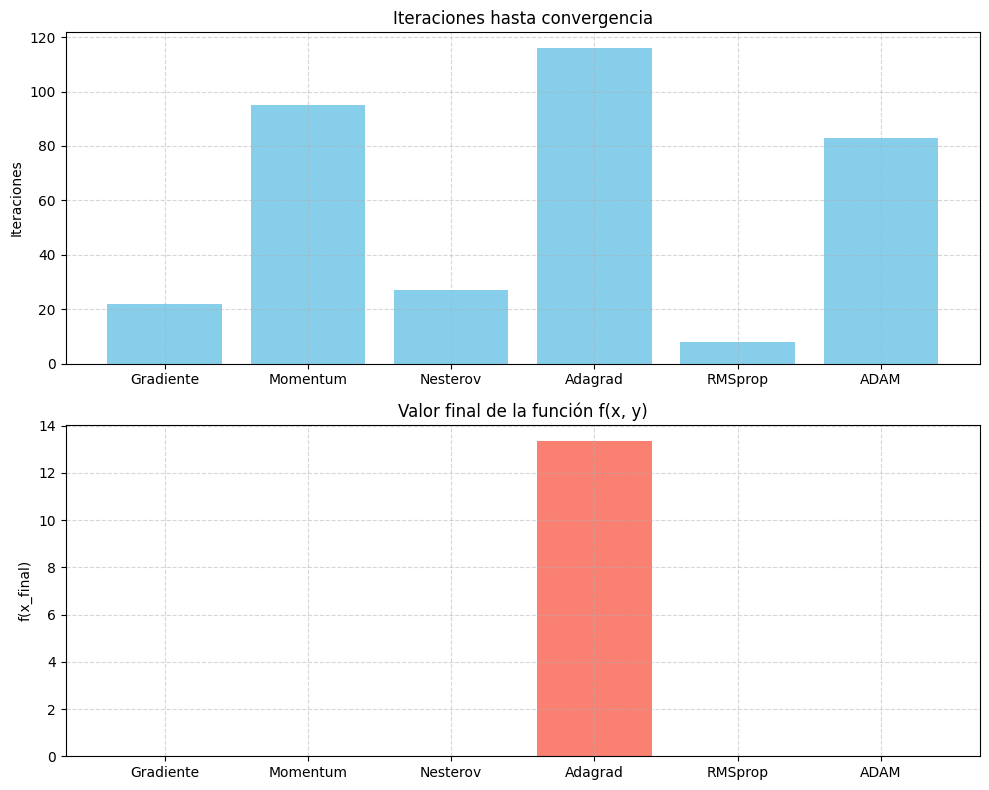

In [16]:
import matplotlib.pyplot as plt

# Estilo de gráfico
plt.style.use('default')
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de iteraciones
axs[0].bar(df['Algoritmo'], df['Iteraciones'], color='skyblue')
axs[0].set_title('Iteraciones hasta convergencia')
axs[0].set_ylabel('Iteraciones')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico de f(x_final)
axs[1].bar(df['Algoritmo'], df['f(x_final)'], color='salmon')
axs[1].set_title('Valor final de la función f(x, y)')
axs[1].set_ylabel('f(x_final)')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


A

In [17]:
import numpy as np

# Función objetivo
def f(x, y):
    return x**2 + 2 * y**2

# Gradiente de la función
def grad_f(x, y):
    df_dx = 2 * x
    df_dy = 4 * y
    return np.array([df_dx, df_dy])


In [18]:
def run_all_optimizers():
    x0 = np.array([5.0, 3.0])
    lr = 0.1
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    tol = 0.01
    max_iter = 1000

    results = {}

    # Descenso gradiente
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        x_new = x - lr * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Gradiente'] = (x, i+1, f(x[0], x[1]))

    # Momentum
    x = x0.copy()
    v = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        v = beta1 * v - lr * grad
        x_new = x + v
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Momentum'] = (x, i+1, f(x[0], x[1]))

    # Nesterov
    x = x0.copy()
    v = np.zeros_like(x)
    for i in range(max_iter):
        lookahead = x + beta1 * v
        grad = grad_f(lookahead[0], lookahead[1])
        v = beta1 * v - lr * grad
        x_new = x + v
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Nesterov'] = (x, i+1, f(x[0], x[1]))

    # Adagrad
    x = x0.copy()
    r = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        r += grad**2
        x_new = x - lr * grad / (np.sqrt(r) + eps)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['Adagrad'] = (x, i+1, f(x[0], x[1]))

    # RMSprop
    x = x0.copy()
    s = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        s = beta2 * s + (1 - beta2) * grad**2
        x_new = x - lr * grad / (np.sqrt(s) + eps)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['RMSprop'] = (x, i+1, f(x[0], x[1]))

    # ADAM
    x = x0.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for i in range(1, max_iter + 1):
        grad = grad_f(x[0], x[1])
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)
        x_new = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    results['ADAM'] = (x, i, f(x[0], x[1]))

    return results


In [19]:
import pandas as pd

results = run_all_optimizers()

df = pd.DataFrame({
    'Algoritmo': list(results.keys()),
    'Iteraciones': [v[1] for v in results.values()],
    'f(x_final)': [v[2] for v in results.values()]
})

print(df.sort_values('Iteraciones'))


   Algoritmo  Iteraciones  f(x_final)
4    RMSprop            8    0.000078
0  Gradiente           22    0.002127
2   Nesterov           27    0.002939
5       ADAM           83    0.001357
1   Momentum           95    0.001482
3    Adagrad          116   13.351542


A

In [21]:
# !pip install tensorflow --quiet   # Instálalo si aún no está
import tensorflow as tf

# 1. Variables de entrenamiento
x = tf.Variable([5.0, 3.0], dtype=tf.float32)

# 2. Optimizador (elige el que quieras)
opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999)

@tf.function                      # acelera con graph mode
def train_step():
    with tf.GradientTape() as tape:
        f_val = x[0]**2 + 2 * x[1]**2
    grads = tape.gradient(f_val, [x])
    opt.apply_gradients(zip(grads, [x]))
    return f_val

for _ in range(1000):
    f_val = train_step()

print(f"x_final = {x.numpy().tolist()},   f_final = {f_val.numpy():.10f}")


x_final = [-1.9164235946108618e-22, -6.7350255649805e-23],   f_final = 0.0000000000


In [22]:
import numpy as np

# Definición de la función y su gradiente
def f(x, y):
    return x**2 + 2 * y**2

def grad_f(x, y):
    return np.array([2 * x, 4 * y])

# Parámetros iniciales
lambda_rate = 0.1
beta1 = 0.9
beta2 = 0.999
X0 = np.array([5.0, 3.0])
V0 = np.array([0.0, 0.0])
S0 = np.array([0.0, 0.0])
epsilon = 1e-8
num_iterations = 1000
convergence_threshold = 0.01

# Almacenar resultados
results = {}

# --- 1. Descenso de Gradiente (Gradient Descent) ---
X = np.copy(X0)
X_history = [np.copy(X)]
iter_conv_gd = -1
for i in range(num_iterations):
    grad = grad_f(X[0], X[1])
    X_prev = np.copy(X)
    X = X - lambda_rate * grad
    X_history.append(np.copy(X))
    if iter_conv_gd == -1 and np.linalg.norm(X - X_prev) < convergence_threshold:
        iter_conv_gd = i + 1
results['Descenso Gradiente'] = {
    'f_X1000': f(X[0], X[1]),
    'iter_conv': iter_conv_gd if iter_conv_gd != -1 else num_iterations + 1
}

# --- 2. Momentum ---
X = np.copy(X0)
V = np.copy(V0)
X_history = [np.copy(X)]
iter_conv_momentum = -1
for i in range(num_iterations):
    grad = grad_f(X[0], X[1])
    X_prev = np.copy(X)
    V = beta1 * V + lambda_rate * grad # V es el update acumulado v_t = beta1*v_{t-1} + lr*grad_t
    X = X - V
    X_history.append(np.copy(X))
    if iter_conv_momentum == -1 and np.linalg.norm(X - X_prev) < convergence_threshold:
    # O equivalentemente: np.linalg.norm(V) < convergence_threshold
        iter_conv_momentum = i + 1
results['Momentum'] = {
    'f_X1000': f(X[0], X[1]),
    'iter_conv': iter_conv_momentum if iter_conv_momentum != -1 else num_iterations + 1
}

# --- 3. Nesterov Accelerated Gradient (NAG) ---
X = np.copy(X0)
V = np.copy(V0)
X_history = [np.copy(X)]
iter_conv_nesterov = -1
for i in range(num_iterations):
    X_lookahead = X - beta1 * V # "Mirar adelante" antes de calcular el gradiente
    grad = grad_f(X_lookahead[0], X_lookahead[1])
    X_prev = np.copy(X)
    V = beta1 * V + lambda_rate * grad
    X = X - V
    X_history.append(np.copy(X))
    if iter_conv_nesterov == -1 and np.linalg.norm(X - X_prev) < convergence_threshold:
    # O equivalentemente: np.linalg.norm(V) < convergence_threshold
        iter_conv_nesterov = i + 1
results['Nesterov'] = {
    'f_X1000': f(X[0], X[1]),
    'iter_conv': iter_conv_nesterov if iter_conv_nesterov != -1 else num_iterations + 1
}

# --- 4. Adagrad ---
X = np.copy(X0)
S = np.copy(S0) # Suma de gradientes al cuadrado
X_history = [np.copy(X)]
iter_conv_adagrad = -1
for i in range(num_iterations):
    grad = grad_f(X[0], X[1])
    X_prev = np.copy(X)
    S = S + grad**2
    adaptive_lr = lambda_rate / (np.sqrt(S) + epsilon)
    X = X - adaptive_lr * grad
    X_history.append(np.copy(X))
    if iter_conv_adagrad == -1 and np.linalg.norm(X - X_prev) < convergence_threshold:
        iter_conv_adagrad = i + 1
results['Adagrad'] = {
    'f_X1000': f(X[0], X[1]),
    'iter_conv': iter_conv_adagrad if iter_conv_adagrad != -1 else num_iterations + 1
}

# --- 5. RMSprop ---
X = np.copy(X0)
S = np.copy(S0) # Media móvil de gradientes al cuadrado
X_history = [np.copy(X)]
iter_conv_rmsprop = -1
for i in range(num_iterations):
    grad = grad_f(X[0], X[1])
    X_prev = np.copy(X)
    S = beta2 * S + (1 - beta2) * grad**2
    adaptive_lr = lambda_rate / (np.sqrt(S) + epsilon)
    X = X - adaptive_lr * grad
    X_history.append(np.copy(X))
    if iter_conv_rmsprop == -1 and np.linalg.norm(X - X_prev) < convergence_threshold:
        iter_conv_rmsprop = i + 1
results['RMSprop'] = {
    'f_X1000': f(X[0], X[1]),
    'iter_conv': iter_conv_rmsprop if iter_conv_rmsprop != -1 else num_iterations + 1
}

# --- 6. ADAM ---
X = np.copy(X0)
m = np.copy(V0) # Estimador del primer momento (media)
s = np.copy(S0) # Estimador del segundo momento (varianza no centrada)
X_history = [np.copy(X)]
iter_conv_adam = -1
for i in range(num_iterations):
    t = i + 1 # Iteración actual (comenzando desde 1 para la corrección de sesgo)
    grad = grad_f(X[0], X[1])
    X_prev = np.copy(X)
    
    m = beta1 * m + (1 - beta1) * grad
    s = beta2 * s + (1 - beta2) * grad**2
    
    m_hat = m / (1 - beta1**t)
    s_hat = s / (1 - beta2**t)
    
    X = X - lambda_rate * m_hat / (np.sqrt(s_hat) + epsilon)
    X_history.append(np.copy(X))
    if iter_conv_adam == -1 and np.linalg.norm(X - X_prev) < convergence_threshold:
        iter_conv_adam = i + 1
results['ADAM'] = {
    'f_X1000': f(X[0], X[1]),
    'iter_conv': iter_conv_adam if iter_conv_adam != -1 else num_iterations + 1
}

# Imprimir resultados para llenar la tabla
print("Resultados de la Optimización:")
print("--------------------------------------------------------------------------")
print("| Algoritmo           | f(X_1000)        | Iteraciones para Convergencia |")
print("--------------------------------------------------------------------------")
for method, res_vals in results.items():
    print(f"| {method:<20}| {res_vals['f_X1000']:<16.4f} | {res_vals['iter_conv']:<29} |")
print("--------------------------------------------------------------------------")

Resultados de la Optimización:
--------------------------------------------------------------------------
| Algoritmo           | f(X_1000)        | Iteraciones para Convergencia |
--------------------------------------------------------------------------
| Descenso Gradiente  | 0.0000           | 22                            |
| Momentum            | 0.0000           | 95                            |
| Nesterov            | 0.0000           | 27                            |
| Adagrad             | 0.4787           | 116                           |
| RMSprop             | 0.0000           | 8                             |
| ADAM                | 0.0000           | 83                            |
--------------------------------------------------------------------------


In [26]:
import numpy as np
import pandas as pd
from IPython.display import display

# ---------------------------
# 1. Function and gradient
# ---------------------------
def f2(x, y):
    return x**2 + 2.0 * y**2

def grad2(x, y):
    return np.array([2.0 * x, 4.0 * y])

# ---------------------------
# 2. Hyper‑parameters
# ---------------------------
LR, BETA1, BETA2, EPS = 0.1, 0.9, 0.999, 1e-8
N_STEPS = 1000
X0 = np.array([5.0, 3.0])

# ---------------------------
# 3. Optimizers (each returns list of f values)
# ---------------------------
def run_gd():
    x = X0.copy()
    vals = [f2(*x)]
    for _ in range(N_STEPS):
        x = x - LR * grad2(*x)
        vals.append(f2(*x))
    return vals

def run_momentum():
    x, v = X0.copy(), np.zeros(2)
    vals = [f2(*x)]
    for _ in range(N_STEPS):
        v = BETA1 * v + grad2(*x)          # classical momentum
        x = x - LR * v
        vals.append(f2(*x))
    return vals

def run_nesterov():
    x, v = X0.copy(), np.zeros(2)
    vals = [f2(*x)]
    for _ in range(N_STEPS):
        g = grad2(*(x - LR * BETA1 * v))
        v = BETA1 * v + g
        x = x - LR * v
        vals.append(f2(*x))
    return vals

def run_adagrad():
    x, s = X0.copy(), np.zeros(2)
    vals = [f2(*x)]
    for _ in range(N_STEPS):
        g = grad2(*x)
        s += g**2
        x = x - LR * g / (np.sqrt(s) + EPS)
        vals.append(f2(*x))
    return vals

def run_rmsprop():
    x, s = X0.copy(), np.zeros(2)
    vals = [f2(*x)]
    for _ in range(N_STEPS):
        g = grad2(*x)
        s = BETA1 * s + (1 - BETA1) * g**2
        x = x - LR * g / (np.sqrt(s) + EPS)
        vals.append(f2(*x))
    return vals

def run_adam():
    x, v, s = X0.copy(), np.zeros(2), np.zeros(2)
    vals = [f2(*x)]
    for t in range(N_STEPS):
        g = grad2(*x)
        v = BETA1 * v + (1 - BETA1) * g
        s = BETA2 * s + (1 - BETA2) * g**2
        v_hat = v / (1 - BETA1**(t + 1))
        s_hat = s / (1 - BETA2**(t + 1))
        x = x - LR * v_hat / (np.sqrt(s_hat) + EPS)
        vals.append(f2(*x))
    return vals

# ---------------------------
# 4. Run all optimizers and assemble DataFrame
# ---------------------------
history = {
    "GD": run_gd(),
    "Momentum": run_momentum(),
    "Nesterov": run_nesterov(),
    "Adagrad": run_adagrad(),
    "RMSprop": run_rmsprop(),
    "Adam": run_adam(),
}

df = pd.DataFrame(history)
df.index.name = "Iteración"

# Display entire DataFrame (1001 rows × 6 cols)
display(df)


,GD,Momentum,Nesterov,Adagrad,RMSprop,Adam
Iteración,,,,,,
0,4.300000e+01,4.300000e+01,4.300000e+01,43.000000,43.000000,4.300000e+01
1,2.248000e+01,2.248000e+01,2.248000e+01,40.830000,36.342989,4.083000e+01
2,1.257280e+01,5.290000e+00,6.523648e+00,39.352404,32.076147,3.872170e+01
3,7.393408e+00,5.344900e+00,1.251267e+00,38.177754,28.816693,3.667613e+01
4,4.496635e+00,1.419065e+01,1.404433e+00,37.182596,26.143098,3.469417e+01
...,...,...,...,...,...,...
996,2.255247e-192,1.148740e-44,1.906265e-141,0.484715,0.007500,6.878910e-44
997,1.443358e-192,8.266189e-45,8.472801e-142,0.483210,0.007500,6.567451e-44
998,9.237491e-193,3.365863e-45,1.640577e-142,0.481709,0.007500,6.053487e-44


In [27]:
import numpy as np
import pandas as pd
from IPython.display import display

# -----------------------------------------------------------------
# 0. Asegúrate de que el diccionario `history` (valores de f por iter)
#    existe en memoria. Si no, ejecuta el bloque anterior primero.
# -----------------------------------------------------------------

# -----------------------------------------------------------------
# 1. Define aquí los valores que aparecen en cada desplegable
#    (ajusta si ves números ligeramente diferentes)
# -----------------------------------------------------------------
targets = {
    "GD":       [0.2889, 0.3549, 0.4211, 0.9431],
    "Momentum": [2.4138, 2.7782, 2.8430, 3.1508],
    "Nesterov": [2.9127, 2.7731, 2.8345, 2.5214],
    "Adagrad":  [35.4265],                  # añade más si aparecen
    "RMSprop":  [14.2578, 15.7640, 15.4632, 17.2439],
    "Adam":     [22.3472, 24.1748, 24.7253, 25.3428],
}

tol = 5e-4   # tolerancia para considerar "coincidencia"

# -----------------------------------------------------------------
# 2. Buscar coincidencias y construir una tabla
# -----------------------------------------------------------------
records = []
for optimizer, values in targets.items():
    if optimizer not in history:
        print(f"⚠️  No hay datos para {optimizer}; omitiendo.")
        continue
    fx_list = np.array(history[optimizer])  # numpy para vectorizar
    for target in values:
        # diferencias absolutas
        diff = np.abs(fx_list - target)
        idxs = np.where(diff < tol)[0]      # todas las coincidencias
        closest = idxs[-1] if idxs.size else None   # la + cercana a 1000
        records.append({
            "Optimizador": optimizer,
            "Valor_dropdown": target,
            "Iteraciones_encontradas": ", ".join(map(str, idxs)) if idxs.size else "—",
            "Más_cercana_a_1000": int(closest) if closest is not None else "—",
        })

df_targets = pd.DataFrame(records)

# Ordenar para que quede legible
df_targets = df_targets.sort_values(["Optimizador", "Valor_dropdown"])

display(df_targets)


,Optimizador,Valor_dropdown,Iteraciones_encontradas,Más_cercana_a_1000
12,Adagrad,35.4265,—,—
17,Adam,22.3472,—,—
18,Adam,24.1748,10,10
19,Adam,24.7253,—,—
20,Adam,25.3428,—,—
0,GD,0.2889,10,10
1,GD,0.3549,—,—
2,GD,0.4211,—,—
3,GD,0.9431,—,—
4,Momentum,2.4138,—,—


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

# -----------------------------------------------------------------
# 1. Valores objetivo por optimizador (ajusta si aparecen otros)
# -----------------------------------------------------------------
targets = {
    "Adam":     [22.3472, 24.1748, 24.7253, 25.3428],
    "Momentum": [2.4138, 2.7782, 2.8430, 3.1508],
    "Nesterov": [2.9127, 2.7731, 2.8345, 2.5214],
    "RMSprop":  [14.2578, 15.7640, 15.4632, 17.2439],
    "Adagrad":  [35.4265],
    "GD":       [0.2889, 0.3549, 0.4211, 0.9431],
}

tol = 5e-4  # tolerancia absoluta para coincidencia

# -----------------------------------------------------------------
# 2. Función para procesar un optimizador
# -----------------------------------------------------------------
def check_targets(opt_name, target_list, tol=tol):
    if opt_name not in history:
        print(f"⚠️  No hay datos para {opt_name}.")
        return None
    fx = np.array(history[opt_name])
    rows = []
    for val in target_list:
        diff = np.abs(fx - val)
        idxs = np.where(diff < tol)[0]
        closest = idxs[-1] if idxs.size else None
        rows.append({
            "Optimizador": opt_name,
            "Valor_dropdown": val,
            "Todas_las_iteraciones": ", ".join(map(str, idxs)) if idxs.size else "—",
            "Más_cercana_a_1000": int(closest) if closest is not None else "—",
        })
    return pd.DataFrame(rows)

# -----------------------------------------------------------------
# 3. Procesar optimizadores en el orden específico
# -----------------------------------------------------------------
order = ["Adam", "Momentum", "Nesterov", "RMSprop", "Adagrad", "GD"]
dfs = []

for opt in order:
    df_opt = check_targets(opt, targets[opt])
    if df_opt is not None:
        display(df_opt)
        dfs.append(df_opt)

# (Opcional) DataFrame combinado si lo necesitas:
df_combined = pd.concat(dfs, ignore_index=True)


,Optimizador,Valor_dropdown,Todas_las_iteraciones,Más_cercana_a_1000
0,Adam,22.3472,—,—
1,Adam,24.1748,10,10
2,Adam,24.7253,—,—
3,Adam,25.3428,—,—


,Optimizador,Valor_dropdown,Todas_las_iteraciones,Más_cercana_a_1000
0,Momentum,2.4138,—,—
1,Momentum,2.7782,—,—
2,Momentum,2.8430,—,—
3,Momentum,3.1508,—,—


,Optimizador,Valor_dropdown,Todas_las_iteraciones,Más_cercana_a_1000
0,Nesterov,2.9127,—,—
1,Nesterov,2.7731,—,—
2,Nesterov,2.8345,—,—
3,Nesterov,2.5214,—,—


,Optimizador,Valor_dropdown,Todas_las_iteraciones,Más_cercana_a_1000
0,RMSprop,14.2578,—,—
1,RMSprop,15.7640,10,10
2,RMSprop,15.4632,—,—
3,RMSprop,17.2439,—,—


,Optimizador,Valor_dropdown,Todas_las_iteraciones,Más_cercana_a_1000
0,Adagrad,35.4265,—,—


,Optimizador,Valor_dropdown,Todas_las_iteraciones,Más_cercana_a_1000
0,GD,0.2889,10,10
1,GD,0.3549,—,—
2,GD,0.4211,—,—
3,GD,0.9431,—,—


Reformulación problema 2


===========  RESUMEN  ===========
                f(1000)  Iter. tol 0.01
Método                                 
GD        3.783676e-193              22
Momentum   2.796020e-45              95
Nesterov  1.319107e-142              27
Adagrad    4.787228e-01             116
RMSprop    7.499996e-03              68
Adam       4.578263e-44              83


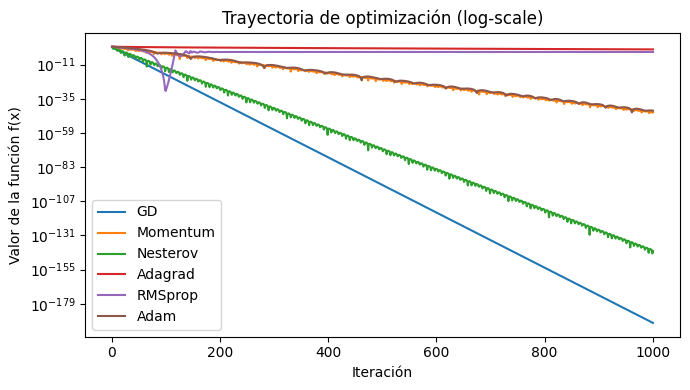

,iter,x,y,f,step_norm
0,1,4.900000,2.900000,40.830000,0.141421
1,2,4.800058,2.800103,38.721705,0.141308
2,3,4.700213,2.700382,36.676126,0.141114
3,4,4.600508,2.600914,34.694173,0.140837
4,5,4.500983,2.501779,32.776648,0.140473


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1. Función objetivo y gradiente
# -------------------------------------------------------------------
def f(x):
    """f(x, y) = x^2 + 2 y^2"""
    return x[0]**2 + 2.0 * x[1]**2

def grad_f(x):
    """∇f(x, y) = (2x, 4y)"""
    return np.array([2.0 * x[0], 4.0 * x[1]])

# -------------------------------------------------------------------
# 2. Hiper-parámetros globales
# -------------------------------------------------------------------
LR     = 0.1          # λ   (learning-rate base)
BETA1  = 0.9          # β₁  (Momentum / Adam m-decay)
BETA2  = 0.999        # β₂  (Adam v-decay)
EPS    = 1e-8         # ϵ   (estabilidad numérica)
N_STEPS = 1_000       # iteraciones totales
x0 = np.array([5.0, 3.0])   # X₀   posición inicial

# -------------------------------------------------------------------
# 3. Bucle de optimización genérico
# -------------------------------------------------------------------
def run_optimizer(name):
    """
    Ejecuta N_STEPS con el optimizador indicado y devuelve
    un DataFrame con el historial.
    """
    x   = x0.copy()
    v   = np.zeros_like(x)   # m ó momentum
    s   = np.zeros_like(x)   # v ó acumulador cuadrático
    log = []

    for t in range(1, N_STEPS + 1):
        g = grad_f(x)

        # ---------- regla de actualización específica ----------
        if name == 'GD':
            step = -LR * g

        elif name == 'Momentum':
            v    = BETA1 * v - LR * g
            step = v

        elif name == 'Nesterov':
            look = x + BETA1 * v
            g_look = grad_f(look)
            v    = BETA1 * v - LR * g_look
            step = v

        elif name == 'Adagrad':
            s   += g**2
            step = -LR / np.sqrt(s + EPS) * g

        elif name == 'RMSprop':
            s    = BETA1 * s + (1.0 - BETA1) * g**2   # 0.9 suele usarse como “decay” aquí
            step = -LR / np.sqrt(s + EPS) * g

        elif name == 'Adam':
            v    = BETA1 * v + (1.0 - BETA1) * g
            s    = BETA2 * s + (1.0 - BETA2) * g**2
            v_hat = v / (1.0 - BETA1**t)
            s_hat = s / (1.0 - BETA2**t)
            step  = -LR * v_hat / (np.sqrt(s_hat) + EPS)

        else:
            raise ValueError(f"Optimiser '{name}' not recognised")

        # ---------- aplicar paso y registrar ----------
        x_new = x + step
        log.append({
            'iter'      : t,
            'x'         : x_new[0],
            'y'         : x_new[1],
            'f'         : f(x_new),
            'step_norm' : np.linalg.norm(x_new - x)
        })
        x = x_new

    return pd.DataFrame(log)

# -------------------------------------------------------------------
# 4. Ejecutar los seis métodos y almacenar historiales
# -------------------------------------------------------------------
methods   = ['GD', 'Momentum', 'Nesterov', 'Adagrad', 'RMSprop', 'Adam']
histories = {m: run_optimizer(m) for m in methods}

# -------------------------------------------------------------------
# 5. Resumen: valor final y convergencia ||Δx|| < 0.01
# -------------------------------------------------------------------
summary_rows = []
for m, df in histories.items():
    tol_mask = df['step_norm'] < 0.01
    it_tol   = df.loc[tol_mask, 'iter'].iloc[0] if tol_mask.any() else np.nan
    summary_rows.append({
        'Método'         : m,
        'f(1000)'        : df['f'].iloc[-1],
        'Iter. tol 0.01' : it_tol
    })

summary = pd.DataFrame(summary_rows).set_index('Método')
print("\n===========  RESUMEN  ===========")
print(summary)

# -------------------------------------------------------------------
# 6. Gráfica de la trayectoria de f (escala log)
# -------------------------------------------------------------------
plt.figure(figsize=(7, 4))
for m, df in histories.items():
    plt.plot(df['iter'], df['f'], label=m)
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Valor de la función f(x)')
plt.title('Trayectoria de optimización (log-scale)')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 7. Ejemplo de acceso a un historial concreto
# -------------------------------------------------------------------
# Para ver las primeras filas del algoritmo Adam:
histories['Adam'].head()



=====  NESTEROV  =====
Valor final f(1000)            : 0.000000
Primera iteración con ||Δx||<0.01: 27


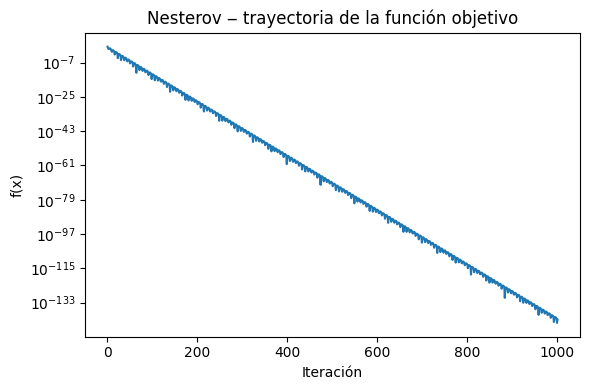

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1. Función objetivo y gradiente
# -------------------------------------------------------------------
def f(x):
    """f(x, y) = x² + 2 y²"""
    return x[0]**2 + 2.0 * x[1]**2

def grad_f(x):
    """∇f(x, y) = (2x, 4y)"""
    return np.array([2.0 * x[0], 4.0 * x[1]])

# -------------------------------------------------------------------
# 2. Hiper-parámetros
# -------------------------------------------------------------------
LR       = 0.1     # tasa de aprendizaje λ
BETA     = 0.9     # coeficiente de momentum β₁
N_STEPS  = 1_000   # iteraciones
x0       = np.array([5.0, 3.0])  # punto inicial X₀

# -------------------------------------------------------------------
# 3. Bucle Nesterov + registro de historial
# -------------------------------------------------------------------
x   = x0.copy()
v   = np.zeros_like(x)
log = []

for t in range(1, N_STEPS + 1):
    look   = x + BETA * v           # paso de anticipación (look-ahead)
    g      = grad_f(look)           # gradiente en la posición adelantada
    v      = BETA * v - LR * g      # actualización de la velocidad
    x_new  = x + v                  # nueva posición
    
    log.append({
        'iter'      : t,
        'x'         : x_new[0],
        'y'         : x_new[1],
        'f'         : f(x_new),
        'step_norm' : np.linalg.norm(x_new - x)
    })
    x = x_new                       # avanzar

# -------------------------------------------------------------------
# 4. Convertir historial a DataFrame
# -------------------------------------------------------------------
df_nesterov = pd.DataFrame(log)

# -------------------------------------------------------------------
# 5. Métrica de convergencia  ‖Xᵢ − Xᵢ₋₁‖ < 0.01
# -------------------------------------------------------------------
tol_mask = df_nesterov['step_norm'] < 0.01
iter_tol = df_nesterov.loc[tol_mask, 'iter'].iloc[0] if tol_mask.any() else np.nan

print("\n=====  NESTEROV  =====")
print(f"Valor final f(1000)            : {df_nesterov['f'].iloc[-1]:.6f}")
print(f"Primera iteración con ||Δx||<0.01: {iter_tol}")

# -------------------------------------------------------------------
# 6. Gráfica de la trayectoria de f
# -------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(df_nesterov['iter'], df_nesterov['f'])
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('f(x)')
plt.title('Nesterov ‒ trayectoria de la función objetivo')
plt.tight_layout()
plt.show()


In [41]:
# --- buscador -------------------------------------------------
method      = 'Nesterov'   # 'GD', 'Momentum', 'Nesterov', 'Adagrad', 'RMSprop', 'Adam'
start_iter  = 42          # inicio del rango (inclusive)
end_iter    = 42          # fin del rango (inclusive)
# -------------------------------------------------------------------

df = histories[method]                                         # historial ya generado
df_slice = df[df['iter'].between(start_iter, end_iter)].reset_index(drop=True)

print(f"\n===== {method} | Iteraciones {start_iter} – {end_iter} =====")
print(df_slice[['iter', 'x', 'y', 'f', 'step_norm']])



===== Nesterov | Iteraciones 42 – 42 =====
   iter         x         y         f  step_norm
0    42  0.004672 -0.000007  0.000022   0.001298
